# <center> Artificial Intelligence in Robotics - Laboratory 1 </center>
### <center> By Lennard Rose 5122737 </center>

In [ ]:
import Lab_1_script
import numpy as np

## <center> T1 - Define a Probability Density Function </center>
##### In Python, functions are usually defined inside a file. Create a file called lab_1_script.py and implement the probability density function p(x). Use the parameters σ = 1.0 and µ = 0.0. Hint: The Python module numpy provides relevant functions and a variable for π: numpy.pi.
$$
\begin{align}
p(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\frac{(x-\mu)}{\sigma}^2}
\end{align}
$$

In [ ]:
def pdf(x, mean=0.0, std=1.0):
    return 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

### <center> 1.a [0.5 marks] </center>
##### What are the values of the mean and standard deviation of the density function p(x)?

The mean has the value 0.0, the standard deviation has the value 1.0 for the density function p(x) in the given example of T1.

### <center> 1.b [1.0 marks] </center>
##### In general, what is the effect of the prefactor $\frac{1}{\sigma\sqrt{2\pi}}$ on the density function p(x)?

The prefactor scales the distribution. Without it, the area under the curve is not necessarily 1.

### <center> 1.c [1.5 marks] </center>
##### Next, launch your script as python lab_1_script.py in the command line. What common probability distribution does the implemented density function describe? In Python, several functions can be defined in one and the same file. The file name and the function names used do not depend on each other.

The implemented desity function describes the gaussian distribution or normal distribution. With the mean of 0.0 and the standard deviation of 1.0 it is called the standard normal distribution.


In [ ]:
import subprocess
# command line call for the pdf, value for x is 100 uniform dist. values between -5 and 5
result = subprocess.run(['python', './Lab_1_script.py', '-m 0',  '-s 1'], shell=True, capture_output=True)
#format output
print(result.stdout.decode("UTF-8"))

## <center> T2 - Plot Data </center>
##### Each Python file is a script that can be evaluated later. It can contain several functions and other numerical calculations in one file. The matplotlib.pyplot module can be used for plotting.

### <center> 2.a [1.5 marks] </center>
##### In lab_1_script.py, use the numpy.linspace command to draw 100 evenly spaced samples from the density function p(x) in the interval [−6, 6]. Plot p(x) vs x for the drawn samples. Save the resulting plot as a PNG-file for your lab report.

In [ ]:
x = np.linspace(-6, 6, 100)
Lab_1_script.plot_pdf(x=x,
                      mean=0,
                      std=1.0,
                      filename="2a")

### <center> 2.b [0.5 marks] </center>
##### Change the parameters to σ = 2.0 and µ = 0.0. Plot the changed density function as above and save it as another PNG-file. Based on the difference that you observe in the original and changed density functions, what is the main effect of changing σ?

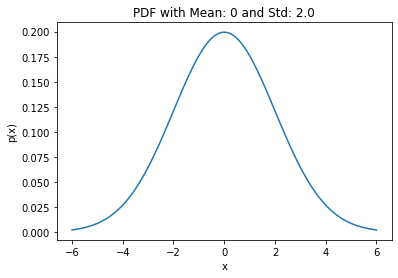

In [8]:
x = np.linspace(-6, 6, 100)
Lab_1_script.plot_pdf(x=x,
                      mean=0,
                      std=2.0,
                      filename="2b")

Changing the std makes the density functions "bell" wider, meaning the values are more spread around the mean (the center).

### <center> 2.c [0.5 marks] </center>
##### Comment on the effect of changing the parameters to σ = 1.0 and µ = 1.0 on the density function.

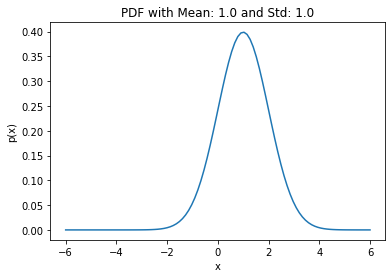

In [9]:
x = np.linspace(-6, 6, 100)
Lab_1_script.plot_pdf(x=x,
                      mean=1.0,
                      std=1.0,
                      filename="2c")

changing the mean to 1.0 shifts the center of the density function to 1.0. This has no effect on the standard deviation and how far the values are distributed around the center.

## <center> T 3 – Generate Random Numbers </center>
##### Random numbers are important in probabilistic modeling, so it is better to know what kind of random variables Python provides and how to use them. Tip: Use numpy.

### <center> 3.a [0.5 marks] </center>
##### In lab_1_script.py, use the numpy.random.normal function to draw 1,000,000 random samples from a normal distribution with a mean of 10.0 and a standard deviation of 4.0.

In [11]:
n_sample = Lab_1_script.draw_normal()

### <center> 3.b [0.5 marks] </center>
##### Use the numpy.random.uniform function to draw 1,000,000 random samples from a uniform distribution over the interval between 0 and 20.

In [12]:
u_sample = Lab_1_script.draw_uniform()

### <center> 3.c [1.0 marks] </center>
##### Calculate and output the sample means and standard deviations of the two sets computed in a) and b) using numpy functions. Explain how the results compare to each other.

In [13]:
print(f"Normal Sample size: {n_sample.shape}")
print(f"Uniform Sample size: {u_sample.shape}")
print(f"Normal Sample mean: {np.mean(n_sample)}")
print(f"Uniform Sample mean: {np.mean(u_sample)}")
print(f"Normal Sample std: {np.std(n_sample)}")
print(f"Uniform Sample std: {np.std(u_sample)}")

Normal Sample size: (1000000,)
Uniform Sample size: (1000000,)
Normal Sample mean: 9.998817790514382
Uniform Sample mean: 9.99703439499988
Normal Sample std: 4.000373127839589
Uniform Sample std: 5.772785681081659


Both distibutions have their center around x = 10. The normal distribution does so because the mean is 10. The uniform distribution does so because its values are evenly distributed between 0 and 20 of which the center is 10.
The standard deviation on the other hand is around 4 for the normal distribution as we specified it (with more samples it gets nearer to be 4.0). Uniform distribution it is around ~5,77 (calculated by $sqrt{(b-a)^2 / 12}$) (b = highest value, a = lowest value).

### <center> 3.d [1.5 marks] </center>
##### Use the hist function to plot separate histograms with 100 bins for each of the sample sets you have generated. Use the help(matplotlib.pyplot.hist) function to get more information on its use. Save the resulting plots as PNG-files for your lab report.

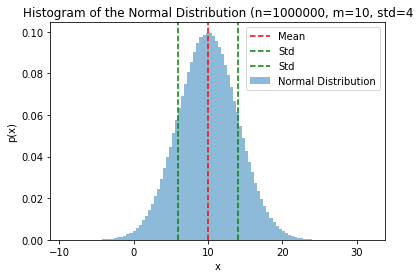

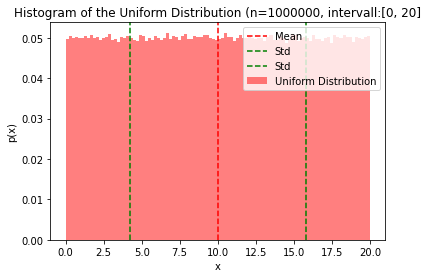

In [16]:
Lab_1_script.plot_histograms(normal_sample=n_sample,
                             uniform_sample=u_sample,
                             filename="3d")

### <center> 3.e [1.0 marks] </center>
##### What is the effect of setting the seed to a fixed value with the function numpy.random.seed before sampling, i.e. when random numbers are generated?

Computers are not really possible to generate true random numbers. It is always done by some sort of algorithm. Setting a seed makes it possible to get the same results from the random functions. This is necessary for reproducibility.

# Attached Code

### Lab_1_script.py

In [ ]:
import numpy as np
import argparse
import matplotlib.pyplot as plt

"""
Task 1 pdf function
"""
def pdf(x, mean=0.0, std=1.0):
    return 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mean) / std) ** 2)


"""
1.c run from cmd
uncomment below to enable
"""
def run_from_console():
    try:
        parser = argparse.ArgumentParser()
        parser.add_argument('-m', '--mean', type=float)
        parser.add_argument('-s', '--std', type=float)
        args = parser.parse_args()

        print(f"Mean: {args.mean}, Std: {args.std} used to calculate pdf:")
        x = np.linspace(-6, 6, 100)  # no x was specified for the cmd call so I use the one from T2
        print(pdf(x, args.mean, args.std))
    except Exception as e:
        print(e)


run_from_console()

"""
2.a
"""
def plot_pdf(x, mean, std, filename):
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.title(f'PDF with Mean: {mean} and Std: {std}')
    plt.plot(x, pdf(x, mean, std))
    plt.savefig(f"./output/{filename}.png")
    plt.show()

"""
3.a
"""
def draw_normal():
    return np.random.normal(10.0, 4.0, 1000000)

"""
3.b
"""
def draw_uniform():
    return np.random.uniform(0, 20, 1000000)

"""
3.d
"""
def plot_histograms(normal_sample, uniform_sample, filename):
    plt.hist(normal_sample, bins=100, density=True, alpha=0.5, label='Normal Distribution')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.axvline(x=np.mean(normal_sample), color='red', linestyle='--', label="Mean")
    plt.axvline(x=np.mean(normal_sample) - np.std(normal_sample), color='green', linestyle='--', label="Std")
    plt.axvline(x=np.mean(normal_sample) + np.std(normal_sample), color='green', linestyle='--', label="Std")
    plt.title('Histogram of the Normal Distribution (n=1000000, m=10, std=4')
    plt.legend()
    plt.savefig(f"./output/{filename}_normal.png")
    plt.legend()
    plt.show()

    plt.hist(uniform_sample, bins=100, density=True, color='red', alpha=0.5, label='Uniform Distribution')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.axvline(x=np.mean(uniform_sample), color='red', linestyle='--', label="Mean")
    plt.axvline(x=np.mean(uniform_sample) - np.std(uniform_sample), color='green', linestyle='--', label="Std")
    plt.axvline(x=np.mean(uniform_sample) + np.std(uniform_sample), color='green', linestyle='--', label="Std")
    plt.title('Histogram of the Uniform Distribution (n=1000000, intervall:[0, 20]')
    plt.legend()
    plt.savefig(f"./output/{filename}_uniform.png")
    plt.show()
